In [122]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [199]:
df1 = pd.read_csv('csv/output.csv')
df2 = pd.read_csv('csv/output2.csv')
df3 = pd.read_csv('csv/output3.csv')
df4 = pd.read_csv('csv/output4.csv')
df5 = pd.read_csv('csv/output5.csv')
df6 = pd.read_csv('csv/output6.csv')
df7 = pd.read_csv('csv/output7.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [200]:
df.head()

,mssg_id,date,sender,subject,snippet
0,18c4bf4ec10b90bb,"Sat, 9 Dec 2023 00:23:11 +0000",PDF Books by Arnold Knopfmacher and other auth...,"Bulk Download 37 books in ""Applied Mathematics""",Academia.edu Bulk Download Books You viewed th...
1,18c4bc29191abb0b,"Fri, 08 Dec 2023 23:28:09 +0000 (UTC)",TMAX 2020 <info@signupgenius.com>,TMAX TaeKwonDo Class (12/11/23~12/16/23) Invite,TMAX TaeKwonDo Class (12/11/23~12/16/23) Hello...
2,18c4b51943498d4a,"Fri, 8 Dec 2023 13:24:47 -0800",dennisfrancis88@gmail.com,"Hello, World!",Hello World!
3,18c4af6089624b22,"Fri, 08 Dec 2023 13:27:50 -0600",Wingstop <wingstop@eclub.wingstop.com>,🤎Celebrate National Brownie Day! 🤎,Treat yourself to our Triple Chocolate Chunk B...
4,18c4aec38c8ec251,"Fri, 08 Dec 2023 19:34:02 +0000 (UTC)",Indie on the Move <info@indieonthemove.com>,"New Show Availability in West Hollywood, CA | ...","IOTM New Show Availability in West Hollywood, ..."


In [70]:
df.loc[df['date'].str[-1] == "T", "date"] = df.loc[df['date'].str[-1]=='T', "date"] + 'aa'

In [71]:
# Convert date to datetime
df.loc[df['date'].str[-1] == "T", "date"] = df.loc[df['date'].str[-1]=='T', "date"] + 'aa'
df.loc[df['date'].str[-1:] == ")", 'date'] = df['date'].str[:-6]
df['date'] = df['date'].str[:-6]
df['date'] = df['date'].str.strip()

date_format_with_day = '%a, %d %b %Y %H:%M:%S'
date_format_no_day = '%d %b %Y %H:%M:%S'
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, date_format_with_day) if ',' in x 
                                            else datetime.strptime(x, date_format_no_day))

In [72]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   mssg_id  650 non-null    object        
 1   date     650 non-null    datetime64[ns]
 2   sender   650 non-null    object        
 3   subject  646 non-null    object        
 4   snippet  644 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 25.5+ KB


In [58]:
# Do not run
df = df.set_index(df['date'])
df = df.drop(columns='date')

# Add a month column (if index is Datetime index)
df['month'] = df.index.month

In [80]:
df['count'] = 1

In [63]:
# What is the start and end date?
df.index.min(), df.index.max()

(Timestamp('2023-06-22 13:11:19'), Timestamp('2023-12-09 00:23:11'))

In [64]:
# What is the length of our time series?
df.index.max() - df.index.min()

Timedelta('169 days 11:11:52')

In [73]:
# Add month column
df['month'] = df['date'].dt.month

# Add hour column
df['hour'] = df['date'].dt.hour

# Add a day column
df['day'] = df['date'].dt.strftime("%a")

In [113]:
# Distribution of emails by weekday
df.groupby('day')['count'].sum()

day
Fri    114
Mon     87
Sat     62
Sun     59
Thu    137
Tue     97
Wed     94
Name: count, dtype: int64

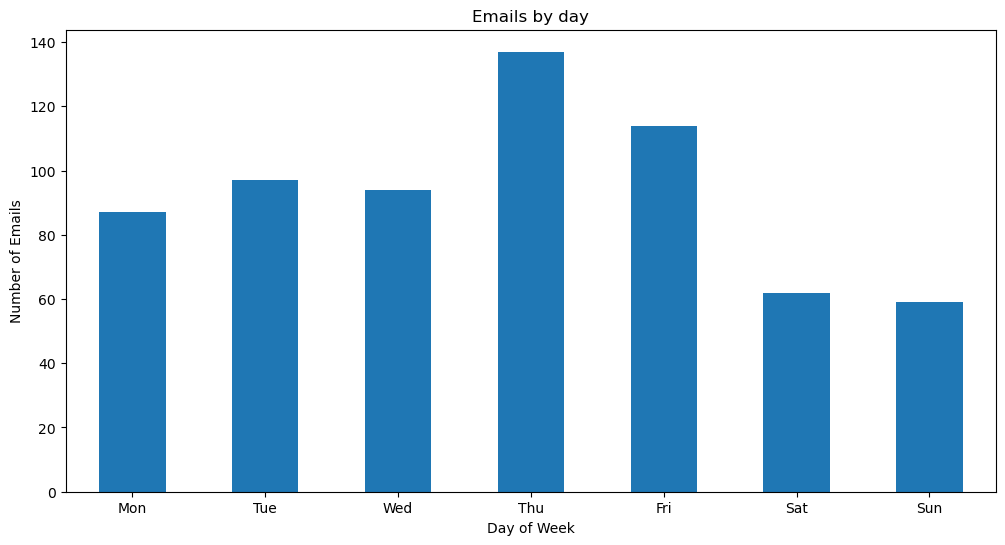

In [149]:
# Again, distribution of emails by weekday
# weekday 0 starts at Monday, Thurday 3 and Friday 4 are highest
fig, axs = plt.subplots(figsize=(12,6))

df.groupby(df['date'].dt.weekday)["count"].sum().plot(
    kind='bar', rot=0, ax=axs)

plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Emails by day")
plt.xlabel("Day of Week")
plt.ylabel("Number of Emails")
plt.savefig("byday.png")

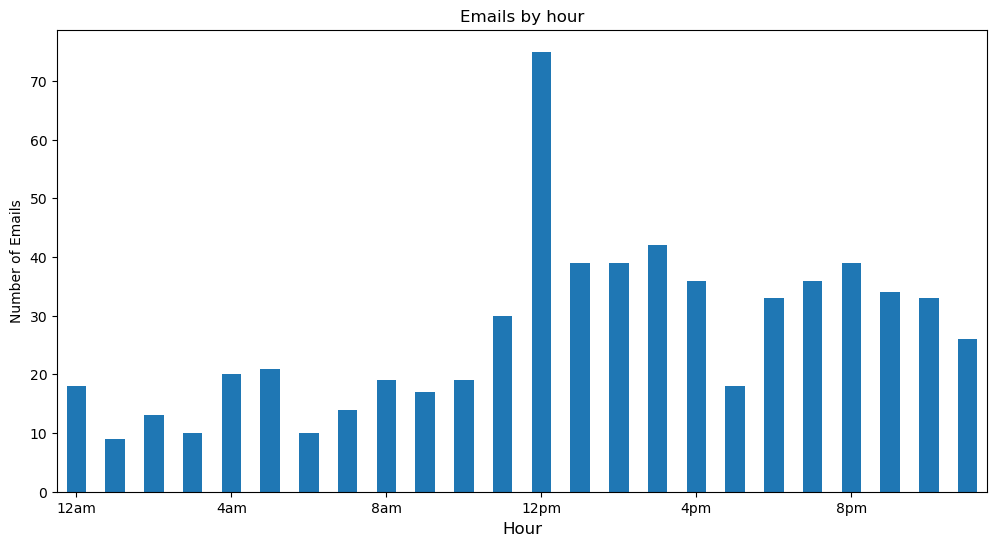

In [150]:
fig, axs = plt.subplots(figsize=(12,6))

df.groupby(df['date'].dt.hour)['count'].sum()  \
        .plot(kind='bar', rot=0)

plt.title('Emails by hour')
plt.xticks(np.arange(0,24, 4), ['12am', '4am', '8am', '12pm', '4pm', '8pm'])
plt.xlabel('Hour', size=12)
plt.ylabel('Number of Emails')
plt.savefig('byhour.png')

In [152]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.4/172.4 kB 899.0 kB/s eta 0:00:00a 0:00:01


In [155]:
text = ' '.join(df['snippet'].astype(str))

In [163]:
text

'Academia.edu Bulk Download Books You viewed the paper, “Combinatorics of geometrically distributed random variables: run statistics” Bulk Download 37 books in Applied Mathematics. Bulk Download Now ▸ TMAX TaeKwonDo Class (12/11/23~12/16/23) Hello, Dennis Francis! You have been invited by TMAX 2020 to sign up for &quot;TMAX TaeKwonDo Class (12/11/23~12/16/23).&quot; Please click on the button below Hello World! Treat yourself to our Triple Chocolate Chunk Brownie. ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ ͏ IOTM New Show Availability in West Hollywood, CA | Indie On The Move What: Last Minute Rap Artists for Whisky a Go Go! When: Wed, Dec 13, 2023 6:45 PM, Sat, Dec 16, 2023 6:45 PM Where: Whisky A Go-Go Eco-friendly, Budget Friendly &amp; Good for the Community What&#39;s on your holiday shopping list this year? Goodwill So Cal stores have gifts to help make this holiday season JOYFU

In [164]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

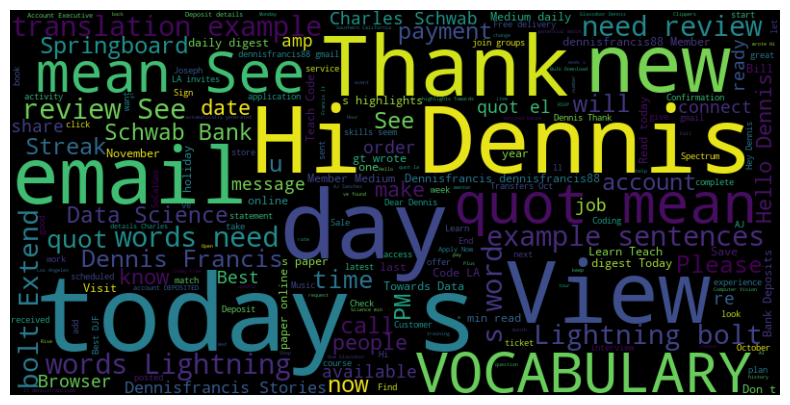

In [167]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("wordcloud.png")



In [170]:
# load labeled data
!ls

Untitled.ipynb   csv              spam-train.csv   wordcloud.png
byday.png        export.csv       spam-valid.csv
byhour.png       quickstart.py    spam.csv
credentials.json spam-test.csv    token.json


In [229]:
df1 = pd.read_csv('spam-train.csv')
df2 = pd.read_csv('spam-test.csv')

In [230]:
df = pd.concat([df1, df2], ignore_index=True)

In [184]:
df['count'] = 1

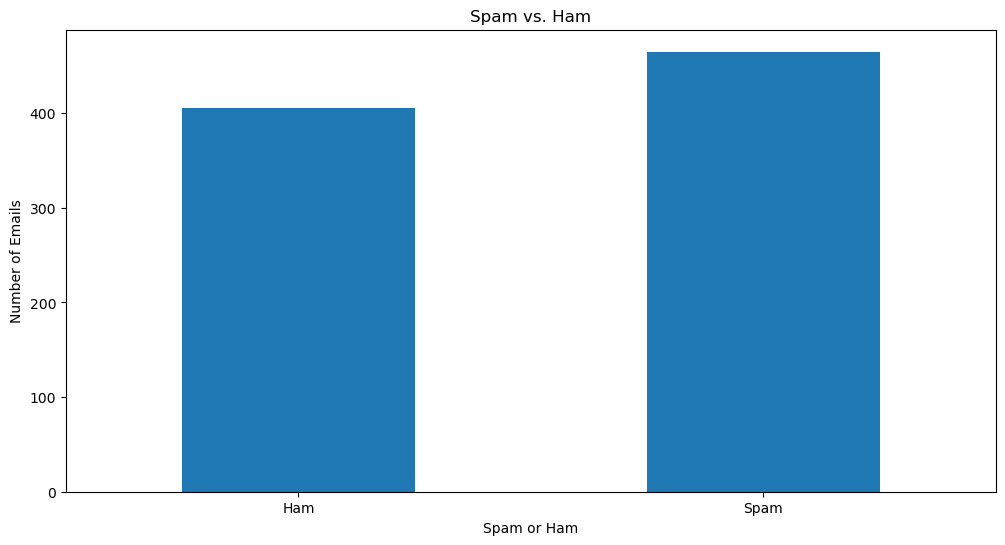

In [193]:
fig, axs = plt.subplots(figsize=(12,6))

df.groupby('label')['count'].sum()      \
    .plot(kind="bar", rot=0)

plt.title("Spam vs. Ham")
plt.ylabel("Number of Emails")
plt.xlabel("Spam or Ham")
plt.xticks([0,1], ["Ham", "Spam"])
plt.savefig("spamorham.png")

In [194]:
spam = df[df['label'] == 1]
ham = df[df['label'] == 0]

In [195]:
spam_text = ' '.join(spam['snippet'].astype(str))
ham_text = ' '.join(ham['snippet'].astype(str))
spam_cloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(spam_text)
ham_cloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(ham_text)

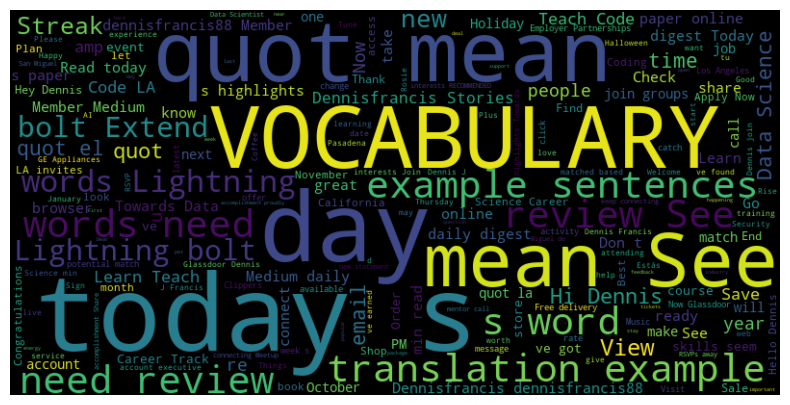

In [196]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_cloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("spamcloud.png")


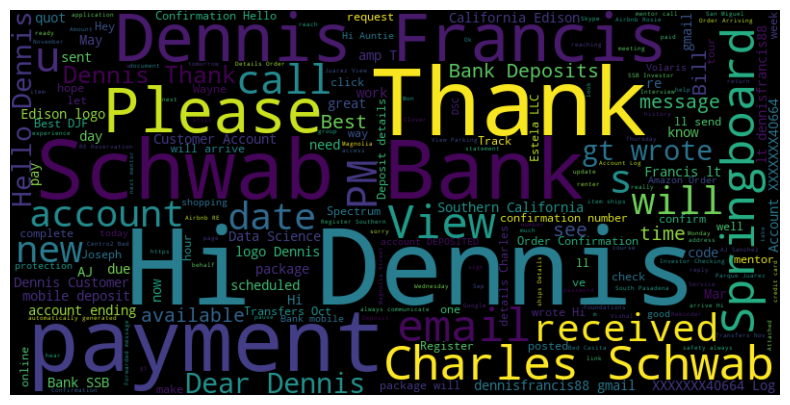

In [197]:
plt.figure(figsize=(10, 5))
plt.imshow(ham_cloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("hamcloud.png")


In [198]:
spam

,snippet,label,count
0,Don&#39;t miss out on important insights ‌ ‌ ‌...,1,1
1,Here are this week&#39;s five freeCodeCamp res...,1,1
2,It&#39;s a great time to restock their favorit...,1,1
3,What does &quot;la vela&quot; mean? See the tr...,1,1
4,Holiday Hacks! ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏...,1,1
...,...,...,...
862,Let&#39;s get you set up for success Hi Dennis...,1,1
863,Let&#39;s get you set up for success Hi Dennis...,1,1
864,You&#39;re enrolled in the Data Science Career...,1,1
866,You&#39;re enrolled in the Data Science Career...,1,1


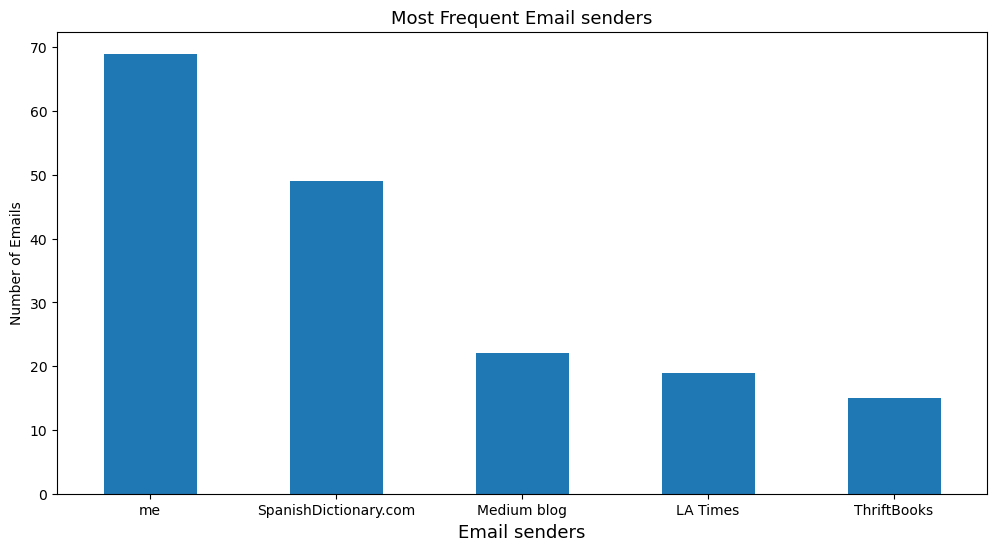

In [228]:
df['count'] = 1

fig, axs = plt.subplots(figsize=(12,6))

top = df.groupby('sender')['count'].sum().sort_values(ascending=False)[:5]   \
       .plot(kind="bar", rot=0)

plt.title("Most Frequent Email senders", size=13)
plt.ylabel("Number of Emails")
plt.xlabel("Email senders", size=13)
plt.xticks(np.arange(5), ["me", "SpanishDictionary.com", 
                          "Medium blog", "LA Times", "ThriftBooks"])

plt.savefig("email-senders.png")

In [209]:
top[:10]

sender
Dennis Francis <dennisfrancis88@gmail.com>                                69
"Juan at SpanishDictionary.com" <noreply@spanishdict.com>                 49
Medium Daily Digest <noreply@medium.com>                                  22
Los Angeles Times <enotify@email.latimes.com>                             19
ThriftBooks <hello@shop.thriftbooks.com>                                  15
Your South Pasadena Central neighbors <no-reply@is.email.nextdoor.com>    13
LinkedIn <jobs-listings@linkedin.com>                                     13
A J Sanchez <a.sanchez.824@gmail.com>                                     12
"Charles Schwab & Co., Inc." <donotreply@mail.schwab.com>                 12
Glassdoor Jobs <noreply@glassdoor.com>                                    10
Name: count, dtype: int64

In [231]:
df

,snippet,label
0,Don&#39;t miss out on important insights ‌ ‌ ‌...,1
1,Here are this week&#39;s five freeCodeCamp res...,1
2,It&#39;s a great time to restock their favorit...,1
3,What does &quot;la vela&quot; mean? See the tr...,1
4,Holiday Hacks! ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏...,1
...,...,...
865,Receipt from Springboard [#1082-2011] Amount p...,0
866,You&#39;re enrolled in the Data Science Career...,1
867,Receipt from Springboard [#1712-0494] Amount p...,0
868,Ready to enroll in the Data Science Career Tra...,1


In [233]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [245]:
df = df.dropna()

In [267]:
X_train, X_test, y_train, y_test = train_test_split(    
           df['snippet'], 
           df['label'], 
           test_size=0.2,
           random_state=42
)

In [268]:
X_train.shape, X_test.shape, y_test.shape

((693,), (174,), (174,))

In [269]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [270]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)

In [274]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8793103448275862
Confusion Matrix:
[[77  3]
 [18 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        80
           1       0.96      0.81      0.88        94

    accuracy                           0.88       174
   macro avg       0.89      0.89      0.88       174
weighted avg       0.89      0.88      0.88       174



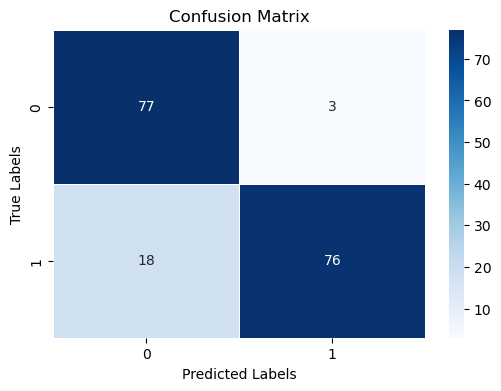

In [279]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("nb-conf-matrix.png")